ETH predictions using arima

In [206]:
import pandas as pd
import numpy as np

In [207]:
import matplotlib.pyplot as plt

In [208]:
df = pd.read_csv('ETH-USD.csv', index_col=[0],parse_dates=[0])  

In [209]:
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-11-09,308.644989,329.451996,307.056000,320.884003,320.884003,8.932500e+08
2017-11-10,320.670990,324.717987,294.541992,299.252991,299.252991,8.859860e+08
2017-11-11,298.585999,319.453003,298.191986,314.681000,314.681000,8.423010e+08
2017-11-12,314.690002,319.153015,298.513000,307.907990,307.907990,1.613480e+09
2017-11-13,307.024994,328.415009,307.024994,316.716003,316.716003,1.041890e+09
...,...,...,...,...,...,...
2023-07-21,1891.581299,1905.386230,1885.296265,1892.080078,1892.080078,4.668158e+09
2023-07-22,1891.955078,1897.088013,1855.092773,1864.912354,1864.912354,4.101306e+09
2023-07-23,1866.094238,1904.483276,1859.568848,1889.191650,1889.191650,4.480604e+09


In [210]:
df1 = pd.read_csv('ETH-USD.csv')

In [211]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2085 entries, 2017-11-09 to 2023-07-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2084 non-null   float64
 1   High       2084 non-null   float64
 2   Low        2084 non-null   float64
 3   Close      2084 non-null   float64
 4   Adj Close  2084 non-null   float64
 5   Volume     2084 non-null   float64
dtypes: float64(6)
memory usage: 114.0 KB


In [212]:
df.isnull().sum()

Open         1
High         1
Low          1
Close        1
Adj Close    1
Volume       1
dtype: int64

In [213]:
df.ffill(axis=0,inplace=True)

In [214]:
df.isnull().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

<Axes: xlabel='Date'>

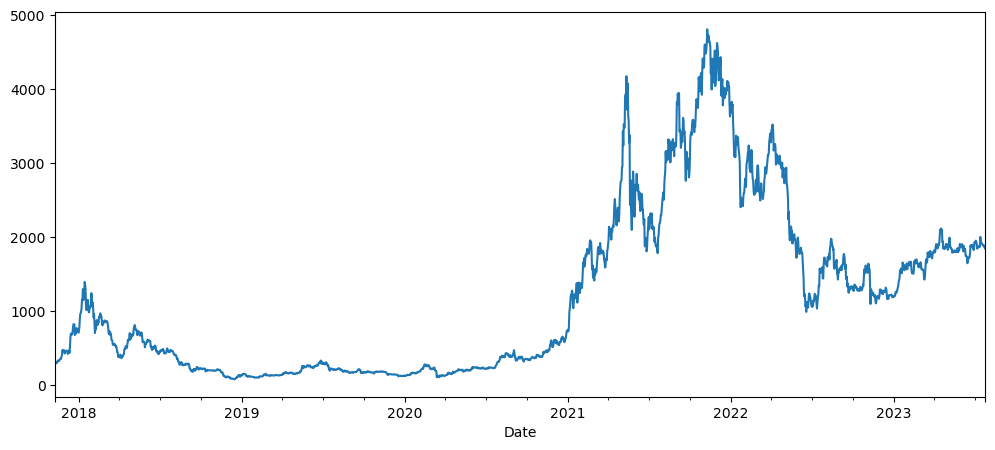

In [215]:
df['Open'].plot(figsize=(12,5))

In [216]:
OpenPrice = df['Open']

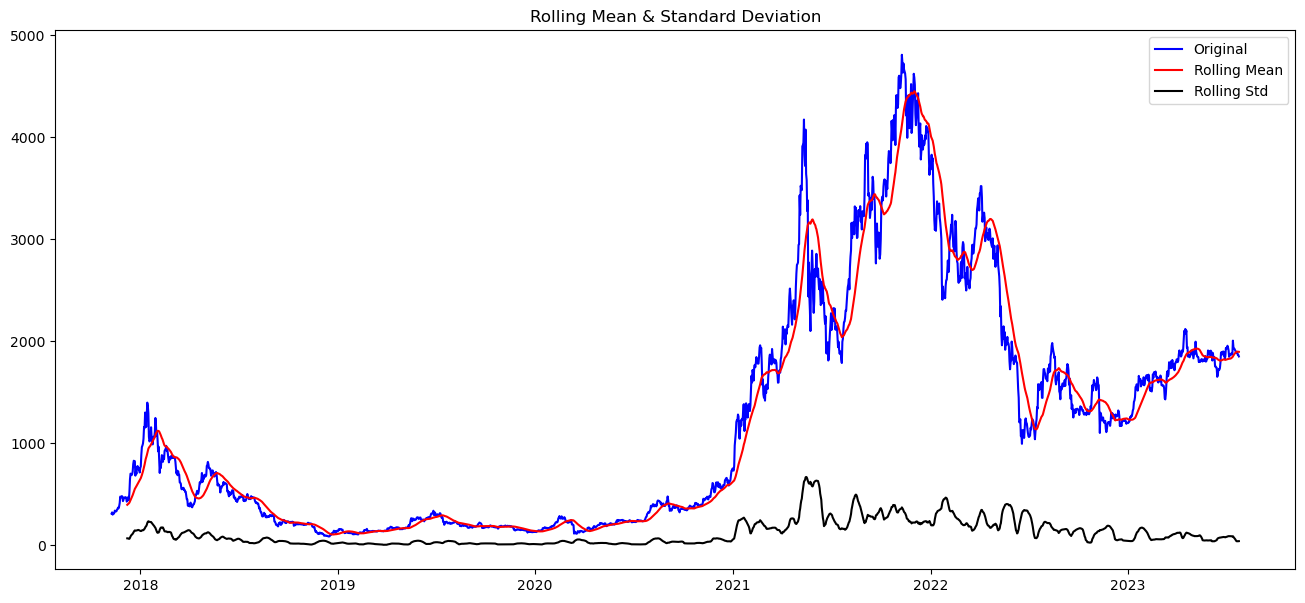

In [217]:
rolLmean = OpenPrice.rolling(30).mean()
rolLstd = OpenPrice.rolling(30).std()

plt.figure(figsize=(16,7))
fig = plt.figure(1)

#Plot rolling statistics:
orig = plt.plot(OpenPrice, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [218]:
from statsmodels.tsa.stattools import adfuller

In [219]:
def dickey_fuller(dataset):
    dftest= adfuller(dataset, autolag='AIC')
    print('test statistic: ',dftest[0],
         '\np value: ', dftest[1],
         '\nnumber of lags: ',dftest[2],
         '\nnumber of values used for calculation: ',dftest[3],
         '\ncritical values: ',dftest[4])

In [220]:
dickey_fuller(df["Open"])

test statistic:  -1.4392020413040638 
p value:  0.5633446583334296 
number of lags:  17 
number of values used for calculation:  2067 
critical values:  {'1%': -3.4335176050024057, '5%': -2.862939302250063, '10%': -2.567514924515897}


Making the data stationary

In [221]:
df_log=np.log(df['Open'])
df_log_diff=df_log.diff().dropna()

In [222]:
df_log_diff

Date
2017-11-10    0.038224
2017-11-11   -0.071358
2017-11-12    0.052530
2017-11-13   -0.024659
2017-11-14    0.031225
                ...   
2023-07-21    0.001327
2023-07-22    0.000198
2023-07-23   -0.013763
2023-07-24    0.000000
2023-07-25   -0.008321
Name: Open, Length: 2084, dtype: float64

In [223]:
dickey_fuller(df_log_diff)

test statistic:  -13.695672542729735 
p value:  1.3183892073958274e-25 
number of lags:  9 
number of values used for calculation:  2074 
critical values:  {'1%': -3.433506900677679, '5%': -2.8629345760724205, '10%': -2.5675124080943377}


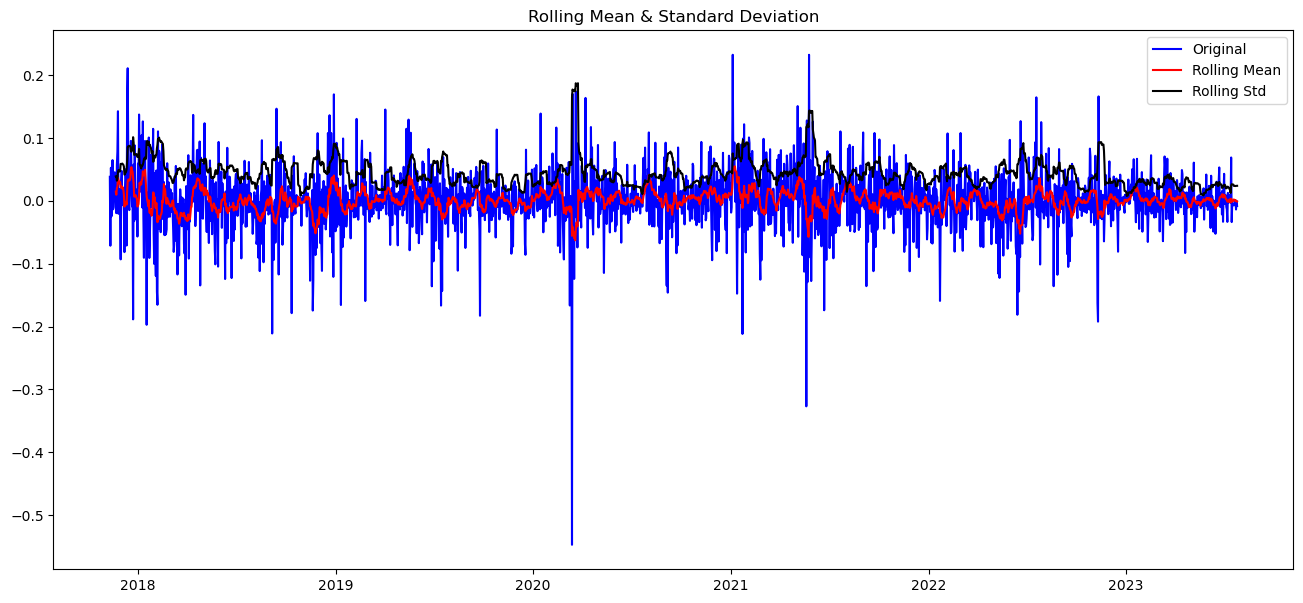

In [224]:
rolLmean = df_log_diff.rolling(12).mean()
rolLstd = df_log_diff.rolling(12).std()




plt.figure(figsize=(16,7))
orig = plt.plot(df_log_diff, color='blue',label='Original')
mean = plt.plot(rolLmean, color='red', label='Rolling Mean')
std = plt.plot(rolLstd, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [225]:
from statsmodels.tsa.stattools import acf, pacf
lag_acf = acf(df_log_diff, nlags=20)
lag_pacf = pacf(df_log_diff, nlags=20)

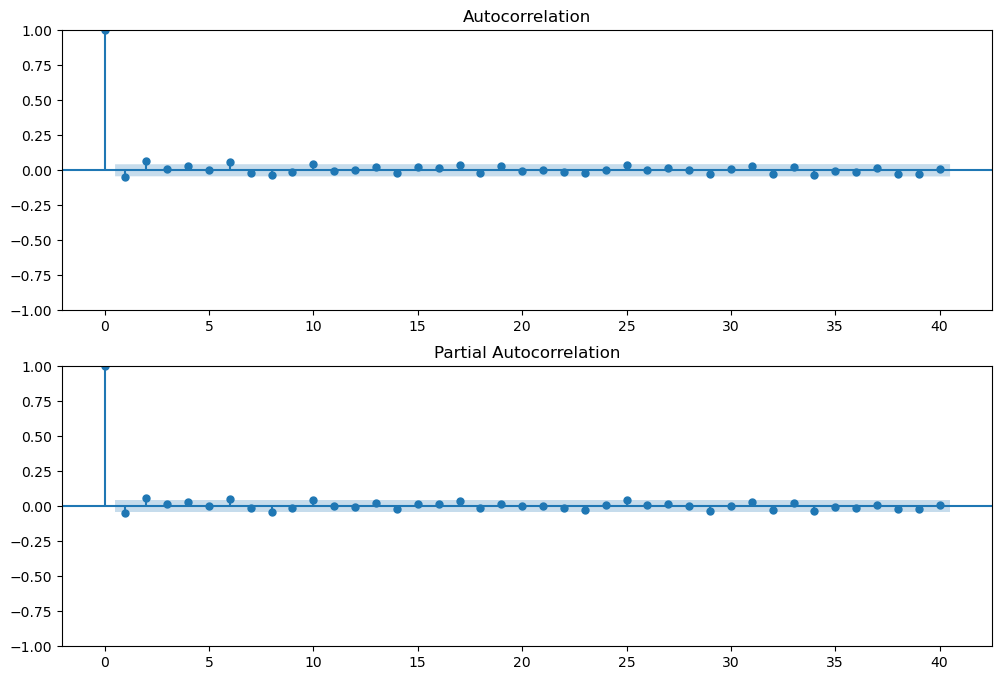

In [226]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df_log_diff.dropna(),lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df_log_diff.dropna(),lags=40,ax=ax2)

train test split

In [227]:
train = df_log_diff[0:-100]
test = df_log_diff[-100:]

In [228]:
len(train)

1984

In [229]:
len(test)

100

Finding Order for ARIMA

In [230]:
from pmdarima import auto_arima

In [244]:
combinations = auto_arima(train,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-6216.534, Time=1.14 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-6214.502, Time=0.25 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-6217.044, Time=0.24 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-6216.539, Time=0.37 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-6215.777, Time=0.18 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=-6222.370, Time=0.51 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=-6221.080, Time=0.77 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=-6223.099, Time=1.91 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-6220.796, Time=1.31 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=-6219.138, Time=0.69 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=-6222.683, Time=2.44 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=-6220.875, Time=2.76 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=-6224.500, Time=0.70 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=-6222.029, Time=0.64 sec
 ARIMA(2,0,0)(0,0,0

In [245]:
combinations.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1984
Model:               SARIMAX(2, 0, 1)   Log Likelihood                3116.250
Date:                Tue, 25 Jul 2023   AIC                          -6224.500
Time:                        17:36:11   BIC                          -6202.129
Sample:                    11-10-2017   HQIC                         -6216.282
                         - 04-16-2023                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5787      0.162      3.571      0.000       0.261       0.896
ar.L2          0.0856      0.019      4.567      0.000       0.049       0.122
ma.L1         -0.6267      0.163     -3.844      0.000      -0.946      -0.307
sigma2         0.0025   3.41e-05     74.216      0.000       0.002       0.003
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              7932.48
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.65   Skew:                            -0.90
Prob(H) (two-sided):                  0.00   Kurtosis:                        12.63
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [233]:
from statsmodels.tsa.arima.model import ARIMA

In [246]:
model = ARIMA(train, order=(2, 0, 1))
model_fit = model.fit()

C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\yk_th\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [247]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                   Open   No. Observations:                 1984
Model:                 ARIMA(2, 0, 1)   Log Likelihood                3116.550
Date:                Tue, 25 Jul 2023   AIC                          -6223.099
Time:                        17:36:18   BIC                          -6195.135
Sample:                    11-10-2017   HQIC                         -6212.827
                         - 04-16-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0010      0.001      0.736      0.462      -0.002       0.004
ar.L1          0.5724      0.166      3.439      0.001       0.246       0.899
ar.L2          0.0853      0.019      4.552      0.0

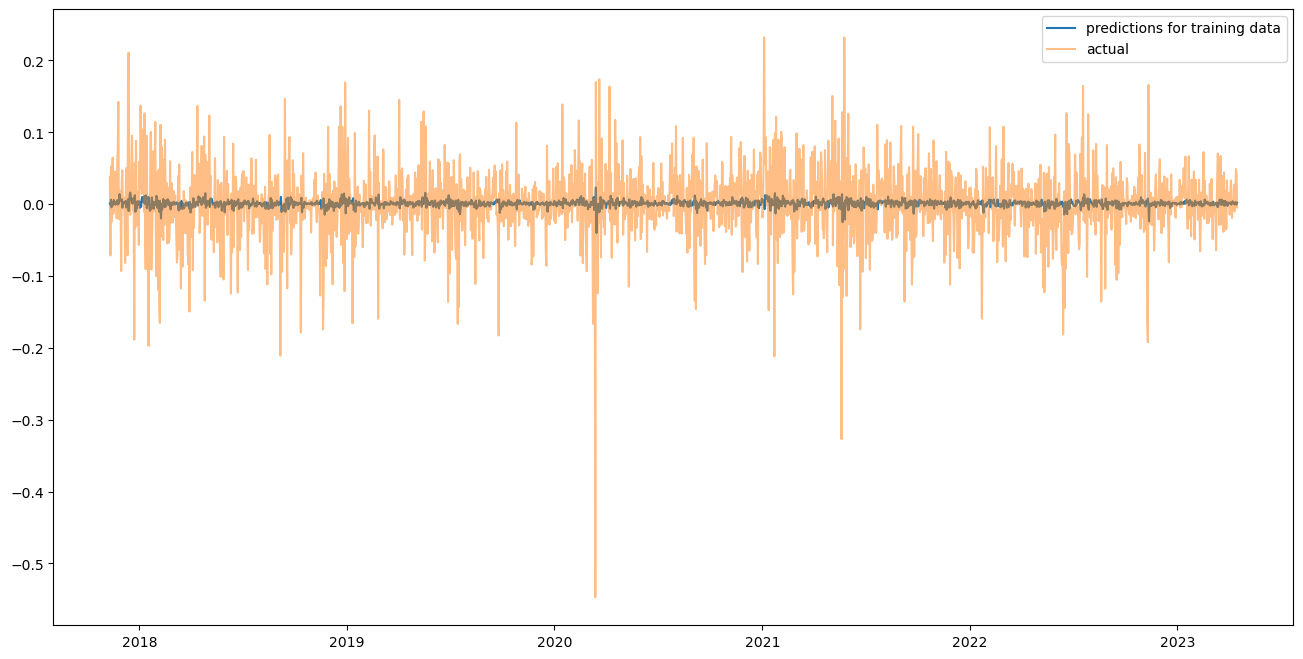

In [248]:
#why
plt.figure(figsize=(16,8))
plt.plot(model_fit.fittedvalues, label='predictions for training data')
plt.plot(train, alpha =0.5, label='actual')
plt.legend()

In [237]:
predictions = model_fit.predict(start=len(train),
    end=len(df_diff)-1,
    dynamic=False)

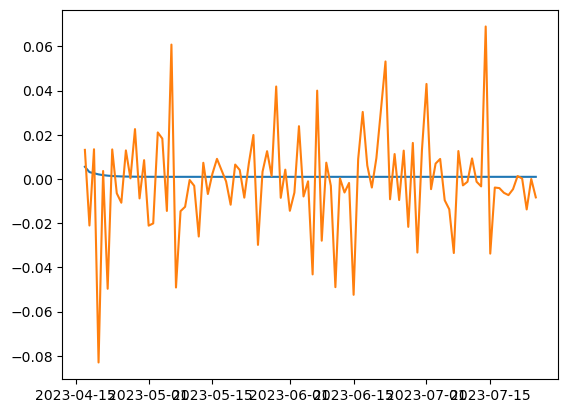

In [238]:
plt.plot(predictions)
plt.plot(test)

Text(0.5, 1.0, 'RMSE: 0.0229')

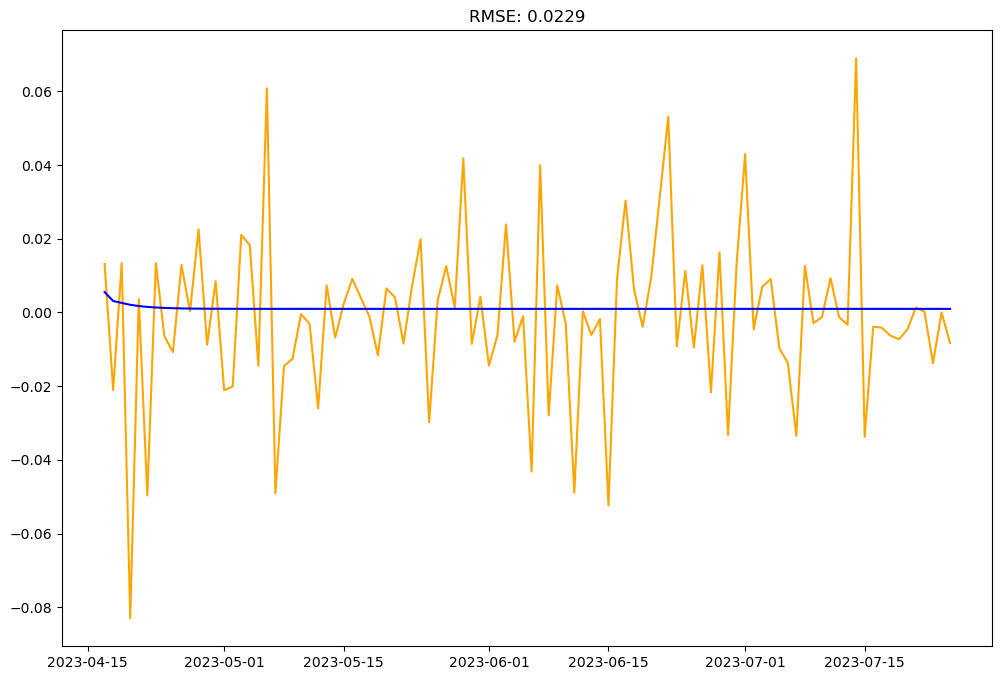

In [239]:
plt.figure(figsize=(12,8))

plt.plot(test, color="orange")
plt.plot(predictions, color = "blue")
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions-test)**2)/len(test)))

In [240]:
details = {'Model':[],'RMSE':[],'MAPE':[],'MAE':[]}

In [241]:
import statsmodels, math
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error, mean_squared_error

In [242]:
mse = mean_squared_error(predictions,test)
print("The RMSE is:",math.sqrt(mse))

mape = mean_absolute_percentage_error(predictions,test)
print("The MAPE is:",mape)

mae = mean_absolute_error(predictions,test)
print("The MAE is:",mae)

details['Model'].append("ARIMA")
details['RMSE'].append(math.sqrt(mse))
details['MAPE'].append(mape)
details['MAE'].append(mae)

The RMSE is: 0.022892538419538214
The MAPE is: 15.270913191706143
The MAE is: 0.015858619250876185


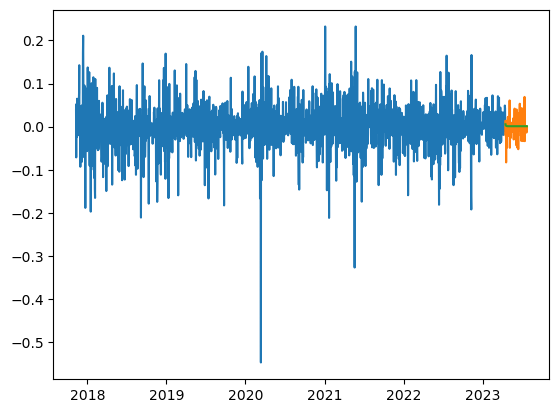

In [243]:
plt.plot(train)
plt.plot(test)
plt.plot(predictions)